<a href="https://colab.research.google.com/github/ahmedebeed555/deeplearning/blob/main/CaliforniaHousingDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch [20/200], Loss: 4.6011
Epoch [40/200], Loss: 3.5752
Epoch [60/200], Loss: 2.8204
Epoch [80/200], Loss: 2.2640
Epoch [100/200], Loss: 1.8399
Epoch [120/200], Loss: 1.5088
Epoch [140/200], Loss: 1.2495
Epoch [160/200], Loss: 1.0490
Epoch [180/200], Loss: 0.8968
Epoch [200/200], Loss: 0.7834

Test MSE: 0.7944


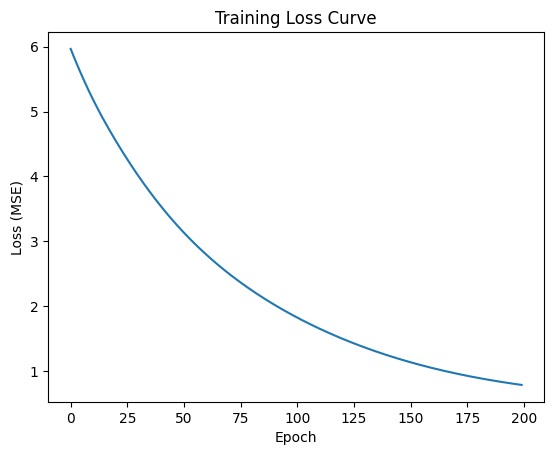

In [3]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Step 5: Define Linear Regression Model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel(X_train.shape[1])

# Step 6: Loss and Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Step 7: Training loop
epochs = 200
losses = []

for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Step 8: Evaluate model
with torch.no_grad():
    y_pred = model(X_test_tensor)
    mse = criterion(y_pred, y_test_tensor)
    print(f"\nTest MSE: {mse.item():.4f}")

# Step 9: Plot training loss
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Curve")
plt.show()


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


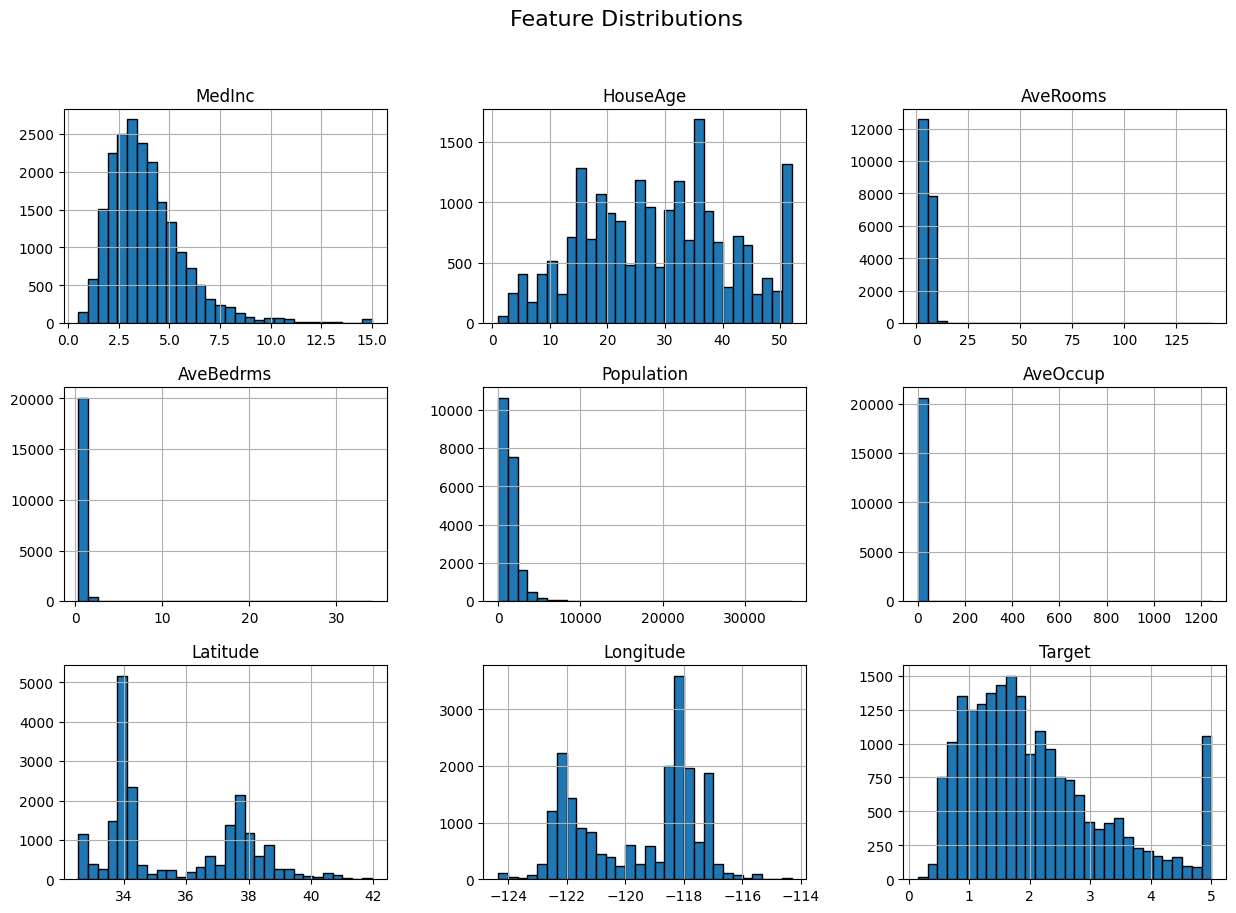

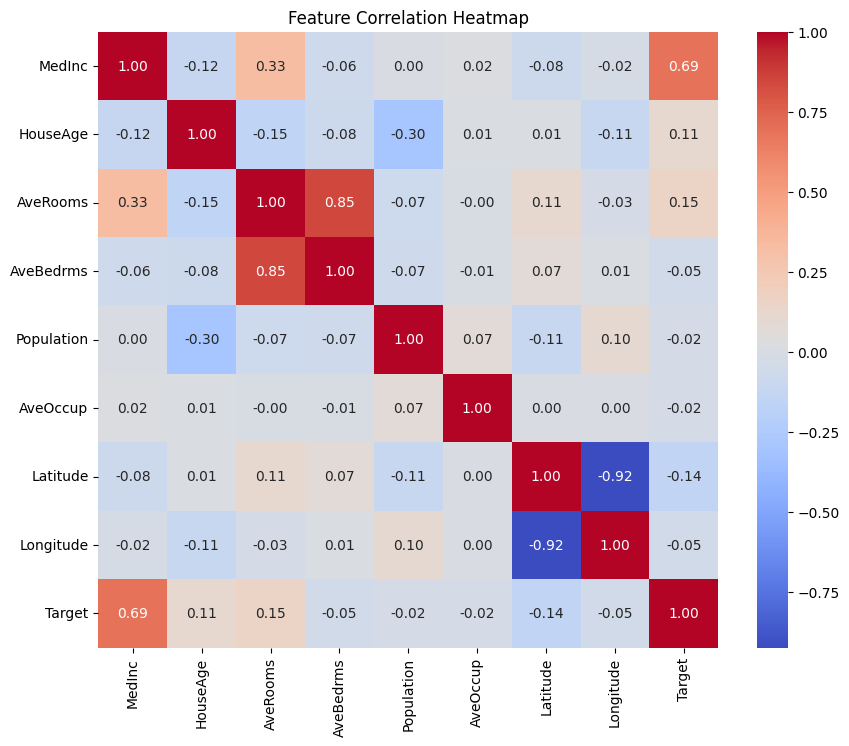

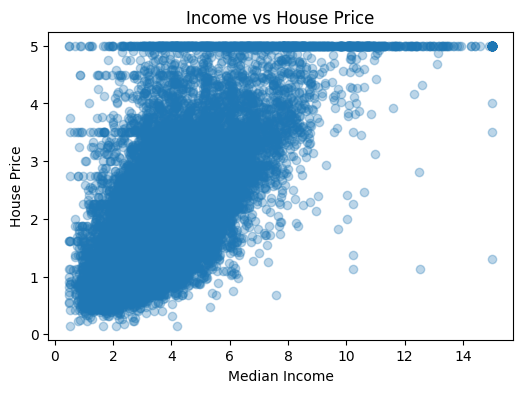

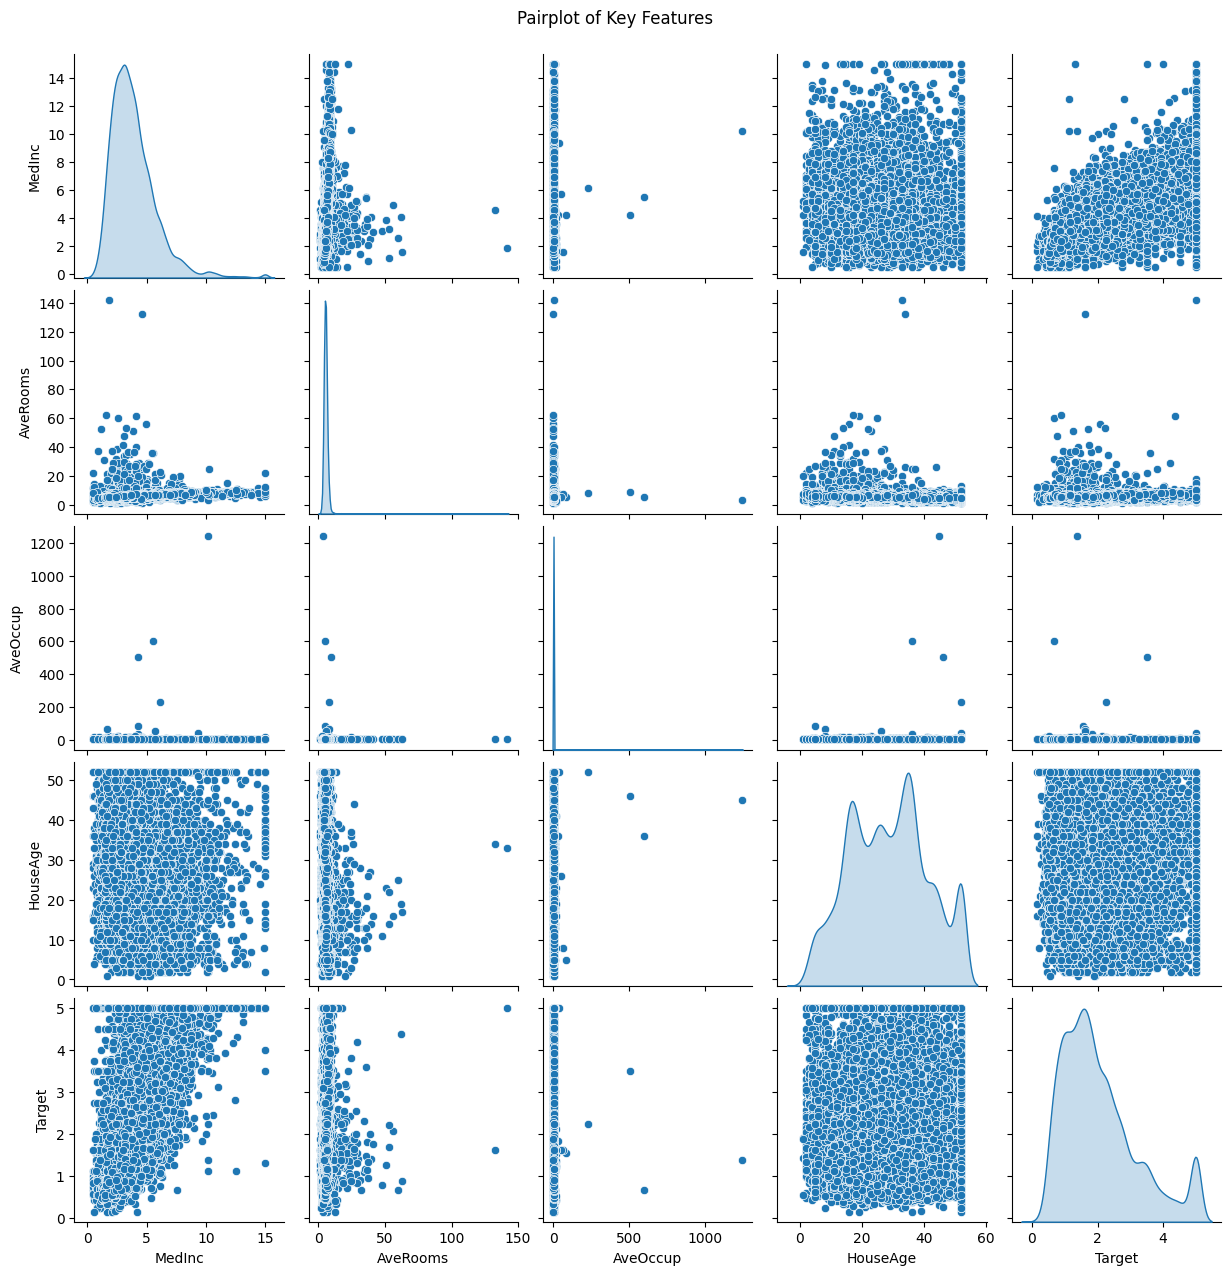

In [4]:
# Load dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['Target'] = housing.target

# 1. Basic info
print(df.head())

# 2. Histogram of all features
df.hist(bins=30, figsize=(15, 10), edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# 3. Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# 4. Scatter plot: MedInc (Median Income) vs Target (House Price)
plt.figure(figsize=(6, 4))
plt.scatter(df["MedInc"], df["Target"], alpha=0.3)
plt.xlabel("Median Income")
plt.ylabel("House Price")
plt.title("Income vs House Price")
plt.show()

# 5. Pairplot of selected features
sns.pairplot(df[['MedInc', 'AveRooms', 'AveOccup', 'HouseAge', 'Target']], diag_kind='kde')
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()
